## Metrics
To measure the success of the IG TV product it is important to define the metrics that will be considred.
A great indicator of user approval of the IG TV product would be how much they interract with the content and the 
Important metrics that could help evaluate the perfomance of the product include.
Number of views 
Average durationof views on videos 
Total view time on IG TV content
Number of likes
Comments on the videos

This notebook uses mock data generated from chat.openai.com/?model=text-davinci-002-render-sha
I seek to model how the total views and sample comments would help the team at Instagram to decide if IG TV is a successful product. 

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [11]:
#Load dataset
data_df = pd.read_csv('MOCK_DATA.csv')
data_df.head()

,video_id,user_id,likes,views,comments,timestamp
0,1,1,40802,109833,3849,7/5/2021
1,2,2,45563,932483,1745,11/2/2021
2,3,3,43237,169419,7698,1/5/2020
3,4,4,15340,475795,2547,8/9/2022
4,5,5,63929,80943,8048,5/5/2020


In [46]:
data_df.describe()

,video_id,user_id,likes,views,comments,engagement_score,success_category
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,500.500000,0.501879,0.494727,0.525557,1.522163,1.063000
std,288.819436,288.819436,0.291018,0.294280,0.289457,0.506608,0.763947
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.143100,0.000000
25%,250.750000,250.750000,0.243025,0.227870,0.278120,1.154928,0.000000
50%,500.500000,500.500000,0.508466,0.482804,0.546717,1.540288,1.000000
75%,750.250000,750.250000,0.745322,0.759179,0.773784,1.886628,2.000000
max,1000.000000,1000.000000,1.000000,1.000000,1.000000,2.823728,2.000000


In [17]:
# Preprocessing: Normalize the metrics
scaler = MinMaxScaler()
data_df[['likes', 'views', 'comments']] = scaler.fit_transform(data_df[['likes', 'views', 'comments']])

In [19]:
# Feature engineering: Calculate a composite engagement score
data_df['engagement_score'] = data_df['likes'] + data_df['views'] + data_df['comments']

In [21]:
X = data_df[['engagement_score']]
kmeans = KMeans(n_clusters=3)  
data_df['success_category'] = kmeans.fit_predict(X)

/Users/sarah/Data-Science/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


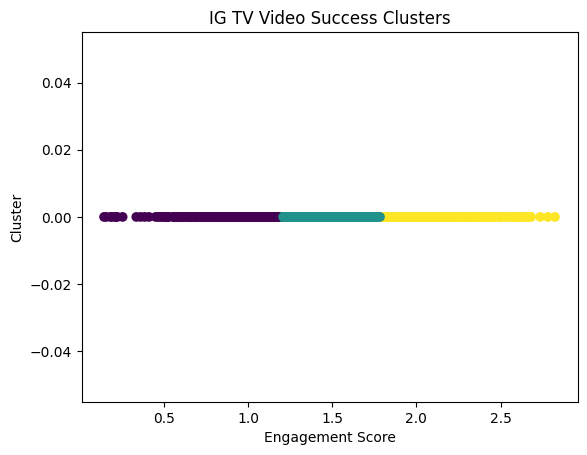

In [25]:
# Visualize
plt.scatter(data_df['engagement_score'], np.zeros(len(data_df)), c=data_df['success_category'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Cluster')
plt.title('IG TV Video Success Clusters')
plt.show()

In [36]:
print(data_df[['video_id', 'success_category']])

     video_id  success_category
0           1                 0
1           2                 1
2           3                 1
3           4                 0
4           5                 1
..        ...               ...
995       996                 1
996       997                 1
997       998                 2
998       999                 2
999      1000                 2

[1000 rows x 2 columns]


This notebook accomplished the following
Calculates an engagement score by summing the normalized values of likes, views, and comments.
Uses K-Means clustering to cluster the videos into different success categories based on their engagement scores.
Visualizes the clusters in a scatter plot.
Prints the videos and their assigned success categories.

In [ ]:
The videos to the right havea higher engagement with the audience in terms of comments, likes and views.